# Dense Feed Forward Neural Network Classification and Regression

In this assignment 
I am asking you to improve the 3 basic feed forward models developed in Chapter 04 of our Chollet textbook "Deep Learning with Python".  The
examples in that chapter present using simple feed forward, fully connected (dense) neural network layers to solve typical machine learning modeling tasks.
In all 3 cases, not much tuning of the model has been done, but you have been give some ideas for further experiements on architecture and metaparameter choices to
try and improve the performance of the models.

This assignment is therefore a bit open ended.  But start from the final model shown at the end of each section of Chapter 4 and improve the performance of each
model on the validation data.  Show a few different attempts for each, and see how much you can improve the actual performance measure (accuracy or MSE respectively) from the start given for each in our textbook.

## Learning Objectives:

After doing this assignment, you'll know how to do the following:

- Create basic dense network layer architectures in Keras.
- Understand difference between classification and regression.
- Know some of the best practices for choosing initial architectures and activation functions, and what should be chosen for classification or regression problems.
- Have some experience with tuning model architectures to improve model performance.
- Understand importance of validation and test data when tuning models.

## Import relevant modules

The following  cell imports the necessary modules and libraries to run the code in the rest of this assignment.

In [1]:
# import relevant modules using common notebook abbreviations for then
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# specify plotting and display defaults to help notebook readability
plt.rcParams['figure.figsize'] = (10, 8) # set default figure size, 10in by 8in
np.set_printoptions(precision=4, suppress=True)

## Define notebook functions

The following functions were given in Chapter 4 or in lecture notebooks, and may be used for more than one of the
model tasks.  In general, it is a good idea to encapsulate repeated tasks as functions, rather than copy/pasting
almost identical code multiple places.

In [3]:
def vectorize_sequences(sequences, dimension=10000):
    """Vectorize word index sequences into a multi-hot encoding.
    The sequences is n array of regular python lists.  We hot encode
    each word we find in the list into a vector of the indicated number
    of feature dimensions, one vector for each of the word sequences /
    reviews.
    """
    # initialize a tensor/array of the correct shape, initialized to all 0's
    results = np.zeros((len(sequences), dimension))
    
    # set specific index to 1 for each word index encountered in the review
    for sequence_num, sequence in enumerate(sequences):
        for word_index in sequence:
            results[sequence_num, word_index] = 1
            
    return results

In [4]:
def to_one_hot(labels, dimension=46):
    """A hand-made implementaiton of one-hot
    encoding.  Given integer labels, reencode as one-hot
    encoded vector.  We assume 46 dimensions of the
    reuters output category labels.  The resulting shape
    of the labels is (num_samples, 46) where each of the
    46 features is a 0 or 1 value, and only one value is 
    encoded as 1, which is the correct category for that sample.
    """
    # create resulting one-hot encoded labels, initialized to all 0's
    # initially
    results = np.zeros((len(labels), dimension))
    
    for sample_num, label in enumerate(labels):
        results[sample_num, label] = 1.0
    return results

In [5]:
def plot_loss_curves(history):
    """Plot training and validation loss.  I don't like using line and points on same plot, so change
    to using color for the two values on plot
    """
    # extract the data to plot
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = np.arange(1, len(loss) + 1)
    
    # plot the loss curves
    fig = plt.figure()
    plt.plot(epochs, loss, 'r-', label='Training loss')
    plt.plot(epochs, val_loss, 'b-', label='Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.xticks(epochs)
    plt.grid()
    plt.legend();

In [6]:
def plot_accuracy_curves(history):
    """Plot training and validation accuracy
    """
    # extract the data to plot
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = np.arange(1, len(acc) + 1)
    
    # plot the accuracy curves
    fig = plt.figure()
    plt.plot(epochs, acc, 'r-', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b-', label='Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.xticks(epochs)
    plt.grid()
    plt.legend();

# Model 1: Binary Classification on Movie Reviews

The first model (section 4.1) is a binary classification task on the IMDB movie review dataset.
The final model from section 4.1.6 is given below.  The following suggestions were given to try
and improve this models performance:

- You used two representation layers before the final classification layer. Try using
  one or three representation layers, and see how doing so affects validation and
  test accuracy.
- Try using layers with more units or fewer units: 32 units, 64 units, and so on.
- Try using the mse loss function instead of binary_crossentropy.
- Try using the tanh activation (an activation that was popular in the early days of
  neural networks) instead of relu.
  
Show several approaches to tuning the model and see how much you can improve accuracy using a
basic feed-forward dense network model.

In [7]:
# load 4.1 IMDB Movie Review dataset and perform preprocessing
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# vectorize the training and test data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

# split training data to reserve some for model validation
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [8]:
# build simple model with 2 hidden layers and a sigmoid activation output layer
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# compile the model, specifying optimizer and training loss and metrics
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

2022-02-09 09:34:09.483187: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-09 09:34:09.488746: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-09 09:34:09.489015: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-09 09:34:09.489791: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [9]:
# train the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 33ms/step - loss: 0.5176 - accuracy: 0.7847 - val_loss: 0.4388 - val_accuracy: 0.8287
Epoch 2/20
30/30 [==============================] - 0s 10ms/step - loss: 0.3075 - accuracy: 0.9017 - val_loss: 0.3260 - val_accuracy: 0.8675
Epoch 3/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2209 - accuracy: 0.9299 - val_loss: 0.2814 - val_accuracy: 0.8901
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1749 - accuracy: 0.9426 - val_loss: 0.2802 - val_accuracy: 0.8867
Epoch 5/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1414 - accuracy: 0.9564 - val_loss: 0.3125 - val_accuracy: 0.8767
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1171 - accuracy: 0.9640 - val_loss: 0.3012 - val_accuracy: 0.8857
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0944 - accuracy: 0.9731 - val_loss: 0.3151 - val_accuracy: 0.8828
Epoch 8/20
30

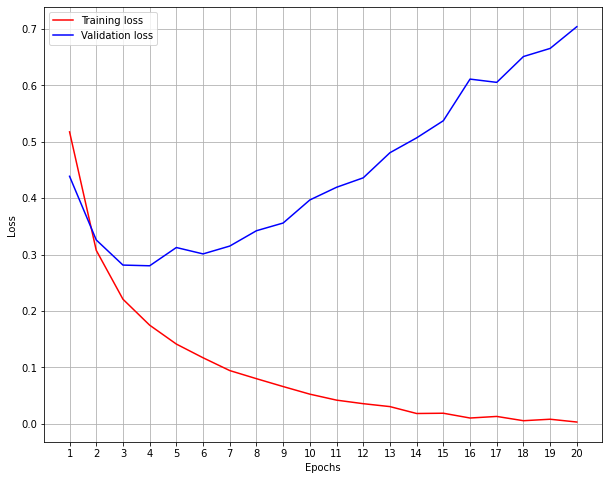

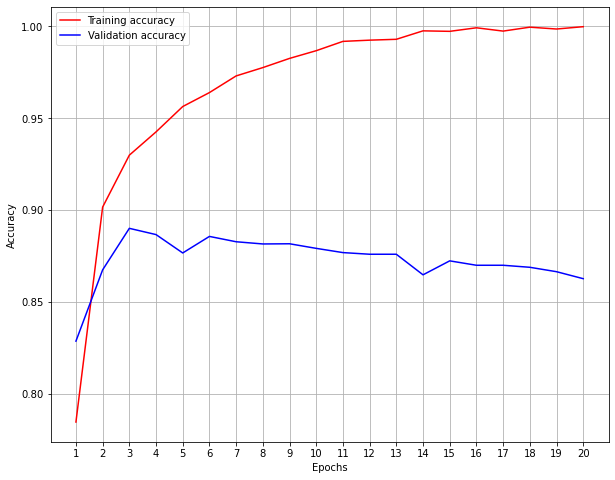

In [10]:
plot_loss_curves(history)
plot_accuracy_curves(history)

In [11]:
# final evaluation on test data example.  stop training after 4 epochs where validation loss
# appears to stop improving
model = keras.Sequential([
            layers.Dense(16, activation="relu"),
            layers.Dense(16, activation="relu"),
            layers.Dense(1, activation="sigmoid")
])

# train the model for 4 epochs
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)


# determine results on the test data, first number is the test loss
# and second is the accuracy
results = model.evaluate(x_test, y_test)
print(results)


Epoch 1/4
49/49 [==============================] - 1s 7ms/step - loss: 0.4862 - accuracy: 0.8194
Epoch 2/4
49/49 [==============================] - 0s 7ms/step - loss: 0.2839 - accuracy: 0.9023
Epoch 3/4
49/49 [==============================] - 0s 7ms/step - loss: 0.2147 - accuracy: 0.9236
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.3443 - accuracy: 0.8614
[0.34434953331947327, 0.8614000082015991]


## Tune the Binary Classification Model here

Try the suggestions and see if you can improve the model performance.  The final performance of the simple model from
the text gets around 88% accuracy classifying the reviews.  How much can you improve this.

# Model 2: Multiclass Classification on Reuters Dataset

The second model discussed in the text was an example of multiclass classification, where we want to
classify the category of a Reuters news article based on the article text.  This dataset is not particular large.
There are only about 9000 training examples, and 2250 articles set aside for the test set.  There are 46 different
topics in this multiclass set of labels.

Below is the code to load and prepare the dataset again, and the basic model created by the textbook.
The following were the suggested things to try to improve this model performance:

- Try using larger or smaller layers: 32 units, 128 units, and so on.
- You used two intermediate layers before the final softmax classification layer.
  Now try using a single intermediate layer, or three intermediate layers.
  

In [12]:
# load the dataset and prepare the data again, similar to
# imdb dataset
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# same encoding as before of inputs as multi-hot encoding, we reuse the vectorize_sequence() function from part 1 again
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# since output labels are multiclass, use a one-hot encoding of labels
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

# split off first 1000 train examples to use for validation
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [13]:
# build simple model with 2 hidden layers.  Output activation layer has
# 46 output units to match number of output labels, and uses softmax
# activation
model = keras.Sequential([
            layers.Dense(64, activation="relu"),
            layers.Dense(64, activation="relu"),
            layers.Dense(46, activation="softmax")
])

# compile model, use categorical_crossentropy which is a suitable loss
# function for multiclass classification
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [14]:
# train the model using validation during training epochs
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 19ms/step - loss: 2.6124 - accuracy: 0.5430 - val_loss: 1.7002 - val_accuracy: 0.6490
Epoch 2/20
16/16 [==============================] - 0s 9ms/step - loss: 1.3951 - accuracy: 0.7086 - val_loss: 1.2956 - val_accuracy: 0.7190
Epoch 3/20
16/16 [==============================] - 0s 10ms/step - loss: 1.0582 - accuracy: 0.7706 - val_loss: 1.1320 - val_accuracy: 0.7550
Epoch 4/20
16/16 [==============================] - 0s 9ms/step - loss: 0.8454 - accuracy: 0.8157 - val_loss: 1.0383 - val_accuracy: 0.7790
Epoch 5/20
16/16 [==============================] - 0s 9ms/step - loss: 0.6806 - accuracy: 0.8542 - val_loss: 0.9894 - val_accuracy: 0.7870
Epoch 6/20
16/16 [==============================] - 0s 10ms/step - loss: 0.5493 - accuracy: 0.8851 - val_loss: 0.9487 - val_accuracy: 0.8080
Epoch 7/20
16/16 [==============================] - 0s 10ms/step - loss: 0.4361 - accuracy: 0.9122 - val_loss: 0.8967 - val_accuracy: 0.8250
Epoch 8/20
16/16

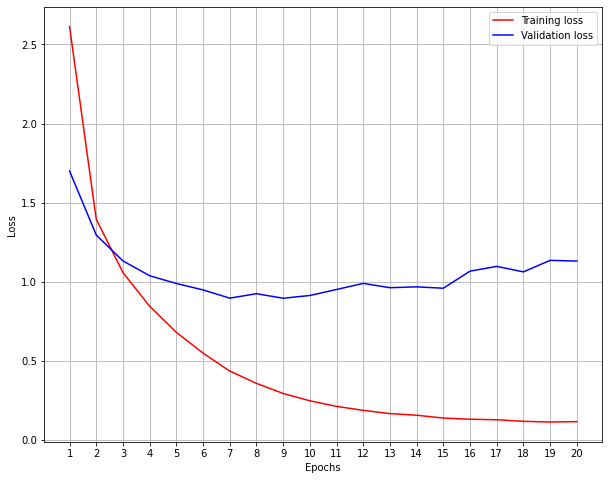

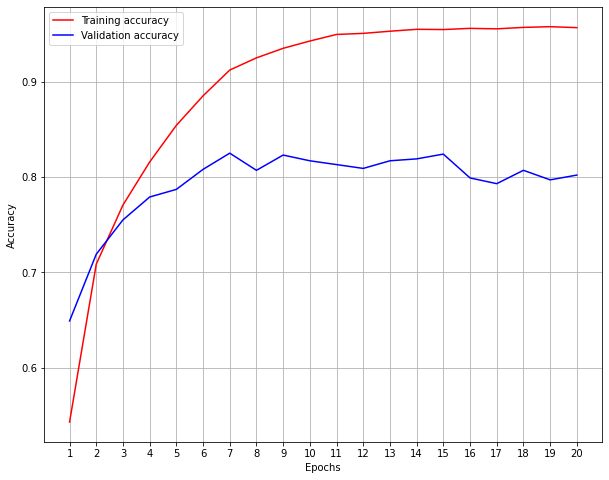

In [15]:
plot_loss_curves(history)
plot_accuracy_curves(history)

In [16]:
# retrain model from scratch and evaluate on test data, stopping after 9
# epochs of training
model = keras.Sequential([
            layers.Dense(64, activation="relu"),
            layers.Dense(64, activation="relu"),
            layers.Dense(46, activation="softmax")
])


# compile model with same loss and optimizer
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# fit model stopping after 9 epochs of training
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)

# jump to directly evaluating results on the test data of this model
results = model.evaluate(x_test, y_test)

print(results)

Epoch 1/9
18/18 [==============================] - 0s 7ms/step - loss: 2.5127 - accuracy: 0.5528
Epoch 2/9
18/18 [==============================] - 0s 7ms/step - loss: 1.3239 - accuracy: 0.7203
Epoch 3/9
18/18 [==============================] - 0s 7ms/step - loss: 0.9818 - accuracy: 0.7954
Epoch 4/9
18/18 [==============================] - 0s 7ms/step - loss: 0.7680 - accuracy: 0.8396
Epoch 5/9
18/18 [==============================] - 0s 8ms/step - loss: 0.6099 - accuracy: 0.8762
Epoch 6/9
18/18 [==============================] - 0s 7ms/step - loss: 0.4824 - accuracy: 0.8998
Epoch 7/9
18/18 [==============================] - 0s 7ms/step - loss: 0.3842 - accuracy: 0.9192
Epoch 8/9
18/18 [==============================] - 0s 7ms/step - loss: 0.3220 - accuracy: 0.9302
Epoch 9/9
71/71 [==============================] - 0s 2ms/step - loss: 0.9653 - accuracy: 0.7903
[0.9652515649795532, 0.7902938723564148]


## Tune the Multiclass Classification Model here

Try the suggestions and see how much you can improve the model accuracy here.  We usually get 80% accuracy on this
multiclass category task, which is not too bad considering a random baseline gets less than 20%.  But you should
be able to improve on that a bit by tuning the architecture.  You can also try seeing if batch size effects
performance.  You could also try some different optimizers than the standard `rmsprop`.

# Model 3: Regression on Boston House Price Dataset

The third model is a regression prediciton task where we want to try and
predict the price of houses based on features like house size, property
tax amounts, etc.  Regression and classification have some basic differences.
Most notebly we need to use different loss functions, and different evaluation
metrics for a regression problem.

The Boston housing price dataset is very small, with 506 samples
total, where 404 are used for training and 102 for test.
Because the dataset is small, the textbook showed using K-fold
cross validation on this dataset, which you should probably continue to
use when tuning the model.  There are 13 features in the dataset when
have different scales, so we also need to scale and normalize the input
data before using it for the regression task.

The text didn't give additional further suggestion for improving performance
on this dataset, and it may be more difficult to improve than the
previous two.  But try similar things to vary network architecture
and see if you can improve the performance with basic dense layer
networks.

In [17]:
# load the boston housing dataset
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = (
        boston_housing.load_data())

# prepare the data, normalize the 13 features to have 0 mean and
# unit standard deviation
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data -= mean
train_data /= std
test_data -= mean
test_data /= std

In [18]:
# text used a function to build and return a model.  this is needed
# for cross validation.  You may need similar function(s) building
# models with different architecture properties you want to try
# notice output layer has a single unit with no activation function
# because this is a regression problem.
def build_model():
    """Build and return a small model for performing regression predictions
    on Boston housing data.
    """
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

In [19]:
# use k-fold validation, performed by hand, with 4 folds in total.
# you could try more or fewer folds to see if it helps performance
# and your evaluation

# you probably should turn the following into a function as well so
# you can call to perform a k-fold validation instead of copy/pasting
# this code multiple times

# this was the second version of the k-fold training, where the full
# history of MAE was saved, so we could plot visualization of
# improvements on validation MAE 
k = 4
num_val_samples = len(train_data) // k
num_epochs = 500 # increase number of epochs of training
all_mae_histories = []

# perform the specified number of training runs
for fold in range(k):
    print(f"Processing fold #{fold}")
    
    # prepare the validation data, data from partition #k
    val_data = train_data[fold * num_val_samples : (fold + 1) * num_val_samples]
    val_targets = train_targets[fold * num_val_samples : (fold + 1) * num_val_samples]
    
    # prepares the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:fold * num_val_samples],
         train_data[(fold + 1) * num_val_samples : ]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:fold * num_val_samples],
         train_targets[(fold + 1) * num_val_samples:]],
        axis=0)
    
    # build and train the model (in silent mode), perform validation
    # on held back fold while performing training epochs
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    
    # save validation history for analysis
    mae_history = history.history["val_mae"]
    
    # append results to process at end
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [20]:
# calculate mean of MAE at each epoch, so can evaluate how well
# this model is doing on validation data and visualize improvement
# of MAE on validation data over the epochs of training
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

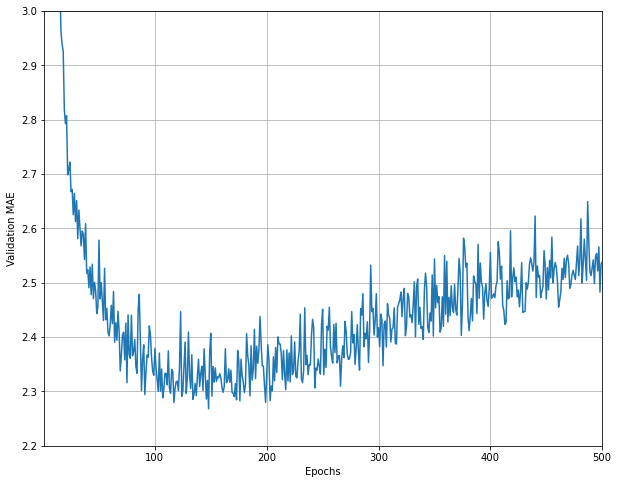

In [21]:
# you might want to turn the visualization into a function as well
# so you can more easily reuse to evaluate multiple models
# NOTE: here slightly different from the book we just specify the
# y axis range so we can more easily see the MAE variation over the
# epochs of training
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.axis([1, 500, 2.2, 3.0])
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.grid();

In [22]:
# the final conclusion from the text was that overfitting occurs somewher
# between 120 and 150 epochs, so train a model that stops at 130 epochs
# and evaluate on test data
# get a fresh compiled model
# notice the text builds this final model on all of the data, not using
# k-folds
model = build_model()

# train it on the entirety of the data
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)

test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

print(test_mae_score)

4/4 [==============================] - 0s 2ms/step - loss: 14.6332 - mae: 2.5951
2.5951077938079834


## Tune the Regression Model here

You normally get around a 2.5 or 2.6 MAE from the shown model, which represents mean average errors of
2500 to 2600 dollars or so.  Try and see if you can improve the model prediction by changing the 
network architecture or using other metaparameters.